In [6]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [3]:
sentences = [
    "I had pizza and pasta",
    "I ate dunner",
    "We had a three-course meal",
    "Brad came to dinner with us",
    "He loves fish tacos",
    "In the end we all felt like we ate too much",
    "We all agreed that it was a magnificent evening",
    "eminerals are beautiful",
    "diamonds are pretty",
    "minerals are not good",
]

In [4]:
embeddings = []

for sent in sentences:
    encoded = tokenizer.encode_plus(sent, return_tensors="pt")
    output = model(**encoded)
    embedding = output.last_hidden_state[:, 0, :].detach().numpy()
    embeddings.append(embedding)

embeddings = np.array(embeddings)

embeddings = np.reshape(embeddings, (embeddings.shape[0], -1))
embeddings = embeddings.astype(np.float64)

pca = PCA(n_components=2)
projected = pca.fit_transform(embeddings)

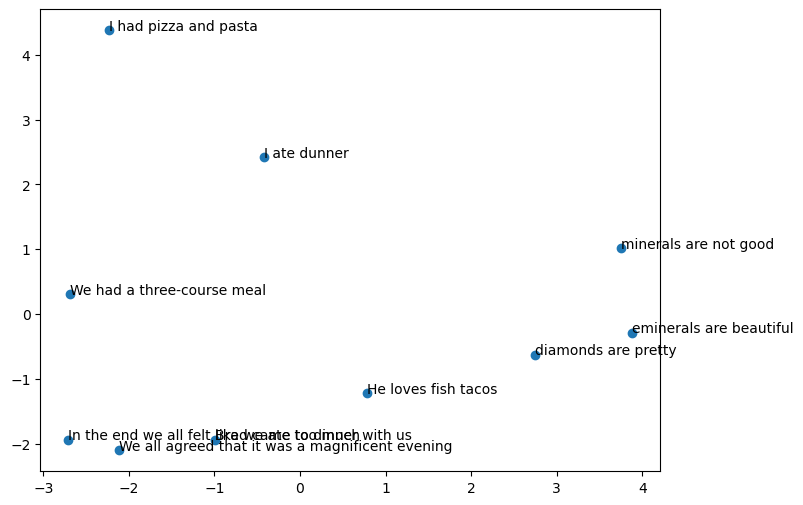

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1])
for i, sent in enumerate(sentences):
    plt.annotate(sent, (projected[i, 0], projected[i, 1]))
plt.show()